# Finite-difference approximation of the wave equation

In this notebook, we study the finite-difference solution of the 1D wave equation

\begin{equation}
\frac{\partial^2 u(x,t)}{\partial t^2} = c^2(x) \frac{\partial^2 u(x,t)}{\partial x^2}\,,
\end{equation}

covered in chapter 6.3.7.1. Specifically, we will consider the accuracy of the approximation as a function of the discretization in space and time.

## 0. Import Python packages

We first import some essential Python packages.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import matplotlib.animation as animation
from IPython.display import HTML

## 1. Setup

**We start by setting up the computational domain.** The grid points along the $x$-axis range from *x_min* to *x_max* in increments of *dx*, which corresponds to $\Delta x$ in the text. The velocity values, *c*, are defined on each grid point. Time starts to run at $t=0$ in increments of *dt*, which is $\Delta t$ in the text. In total, we perform *nt* time steps. All numbers are assumed to have SI units, i.e., m for length, s for time, etc. Here, we do not run any computations. We merely plot the velocity distribution as a function of the $x$-coordinate.

In [2]:
# x-coordinate axis.
x_min=0.0  # minimum x value in m
x_max=600.0  # maximum x value in m
dx=0.5  # x increment (grid spacing) in m

x=np.arange(x_min, x_max + dx, dx)
nx=len(x)  # number of grid points

# Velocity distribution (some subjectively chosen velocity values along the x-axis).
c=1.0*np.ones(np.shape(x))  # velocity in m/s
c[100:300]=1.0+np.arange(0.0,0.5,0.0025) 
c[900:1100]=0.5

# Time axis.
nt=1000  # number of time steps
dt=0.25  # time increment in s

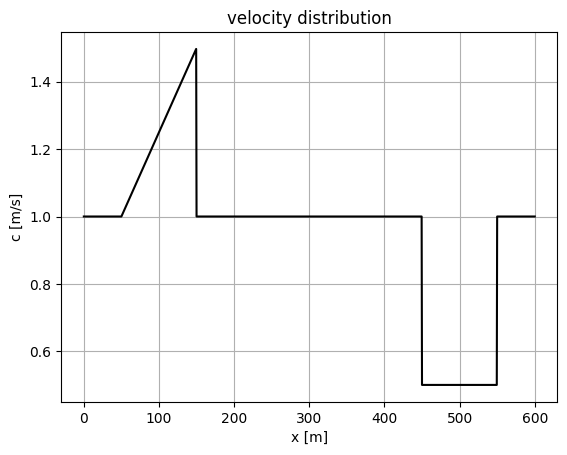

In [3]:
# Plot velocity distribution.
plt.plot(x,c,'k')
plt.xlabel('x [m]')
plt.ylabel('c [m/s]')
plt.grid()
plt.title('velocity distribution')
plt.show()

## 2. Initializing the displacement field

**We initialize the displacement field at the beginning of the simulation.** The initial shape of the wave is something we are free to choose. For convenience, we let $u(x,t=0)$ be the first derivative of a Gaussian (also known as *Ricker wavelet*) with variance $l$. This will roughly be the wavelength of the propagating wave. For the previous time step, i.e., $t=-\Delta t$, we choose the same wave shape. Again, there are no computations; only plotting.

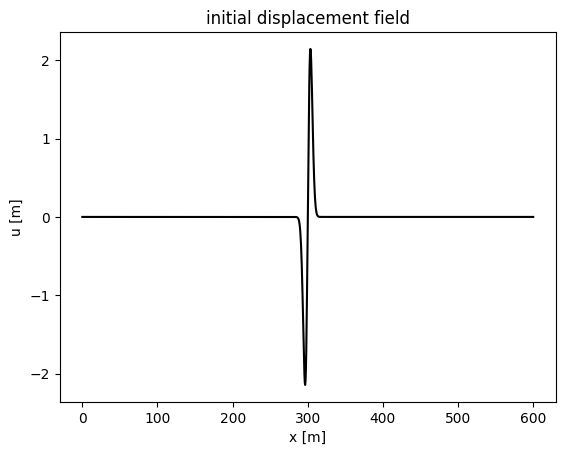

In [4]:
# Dominant wavelength of the displacement field [m].
l=5.0

# Initial displacement field [m].
u=(x-300.0)*np.exp(-(x-300.0)**2/l**2)  # Subjectively chosen. This is the derivative of a Gaussian.

# Displacement field in previous time step [m].
u_previous=u

# Plot initial displacement field.
plt.plot(x,u,'k')
plt.xlabel('x [m]')
plt.ylabel('u [m]')
plt.title('initial displacement field')
plt.show()

## 3. Time stepping

**With everything set up, we can now loop from one time step to the next.** For this, we define an auxiliary variable *ddu* which will take the discrete version of the second derivative $\partial^2 u / \partial x^2$. The loop runs over all time steps until the time index *i* has reached the value *nt*, defined above. Within the loop, we first compute *ddu*, and then the displacement field in the next time step, *u_next*, as described in the text (Eq. 6.102). Finally, in each loop iteration, we set the previous time step to the current one, and the current one to the next one, which we just computed. With this, we can continue to the next step. In the end, we plot the resulting wavefield.

In [5]:
def plotWavefield(u):
    # Plot wavefield.
    fig, ax = plt.subplots(figsize=(8, 4))
    li, = plt.plot(x,u)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('u [m]')
    ax.grid()
    ax.vlines([50, 150, 450, 550], -1.5, 1.5, color="red", ls="dashed")
    return li

In [6]:
def modelfield(u, u_previous, nt=10, show=1):
    # Initialize second derivative of the displacement field
    ddu=np.zeros_like(u)
    U = np.zeros([nt//show + 2, len(u)])
    U[0] = u
    ii = 0
    for i in range(nt+1):
        # Approximate 2nd derivative of the wavefield.
        ddu[1:nx-1]=(u[2:nx]-2.0*u[1:nx-1]+u[0:nx-2])/dx**2
        # Compute next time step.
        u_next=2.0*u-u_previous+dt**2 * c**2 * ddu 
        u_previous=u
        u=u_next    
        if i % show == 0:
            ii += 1
            U[ii] = u
    
    return U

In [7]:
U = modelfield(u, u_previous, 1000, show=10)

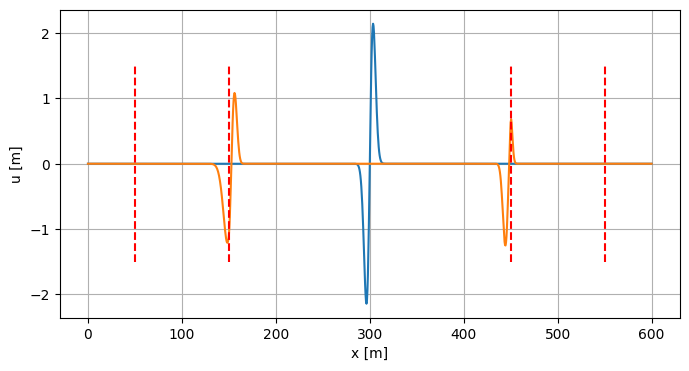

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot(x, u)
line, = ax.plot(x, U[60])
ax.set_xlabel('x [m]')
ax.set_ylabel('u [m]')
ax.vlines([50, 150, 450, 550], -1.5, 1.5, color="red", ls="dashed")
ax.grid();

In [9]:
def animate(i):
    line.set_ydata(U[i])
    return line,

ani = animation.FuncAnimation(fig, animate, blit=True, 
                              interval=20, frames=len(U)) # save_count=22)
HTML(ani.to_html5_video())

In [10]:
ani.save("wave.mp4")

## 4. Exercises

1) Compute the wavefield for different numbers of time steps, nt=100, 200, ..., 1000. What do you observe at the boundaries of the high-velocity regions? What happens at the boundaries of the domain, and why?


2) Change the initial wavelength of the wave (variable "l" in step 2) from 5.0 m to 2.0 m. What do you observe and why?


3) Increase the time step (variable *dt* in step 1) from 0.25 s to 1.0 s. Does this numerical simulation still produce accurate results?

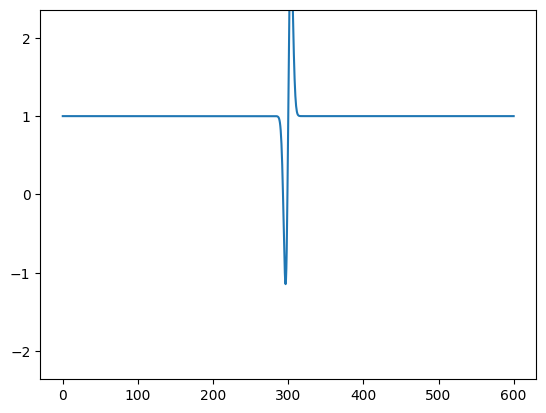

In [11]:
fig, ax = plt.subplots()
li = ax.plot(x, u)[0]
li.set_ydata(u+1)